In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 

In [2]:
# Load the training and test data
train_data = pd.read_csv(r'C:\Users\Sooraj\Downloads\SalaryData_Train(1).csv')
test_data = pd.read_csv(r'C:\Users\Sooraj\Downloads\SalaryData_Test(1).csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
train_data.shape

(30161, 14)

In [6]:
test_data.shape

(15060, 14)

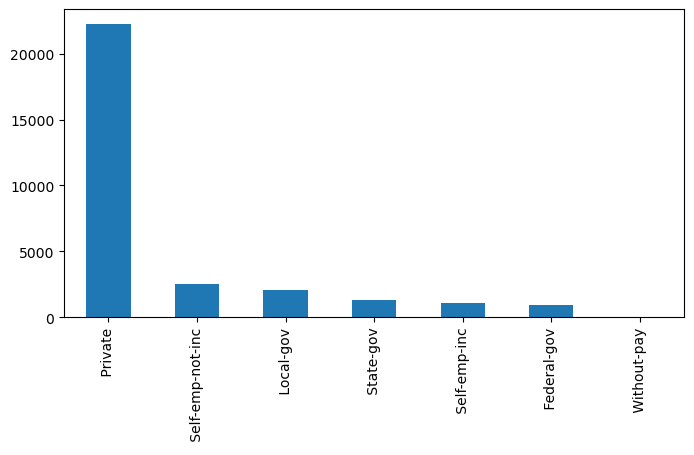

In [7]:
plt.figure(figsize=(8,4))
train_data.workclass.value_counts().plot.bar();

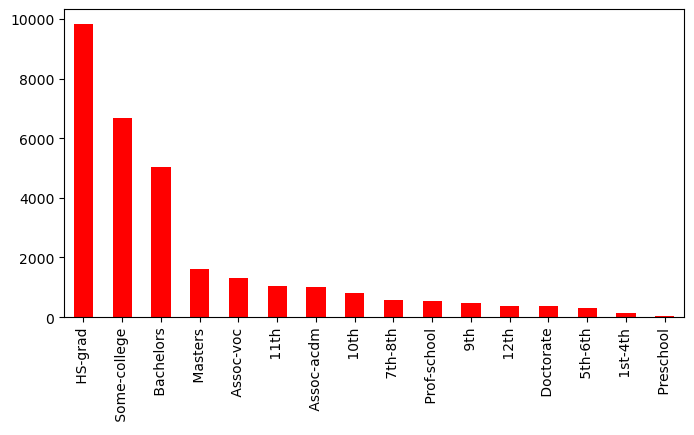

In [8]:
plt.figure(figsize=(8,4))
train_data.education.value_counts().plot.bar(color='red');

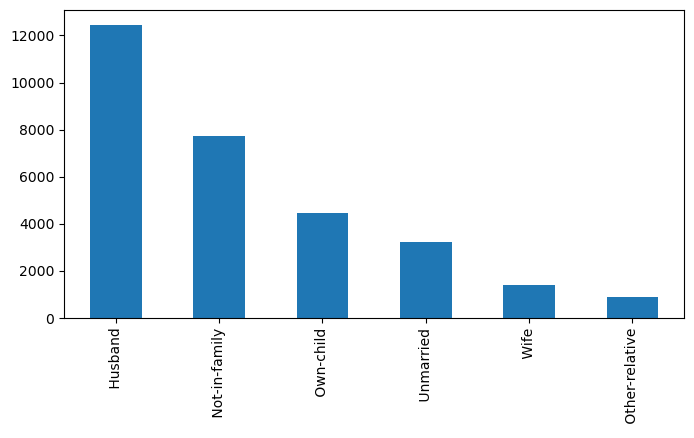

In [9]:
plt.figure(figsize=(8,4))
train_data.relationship.value_counts().plot.bar();

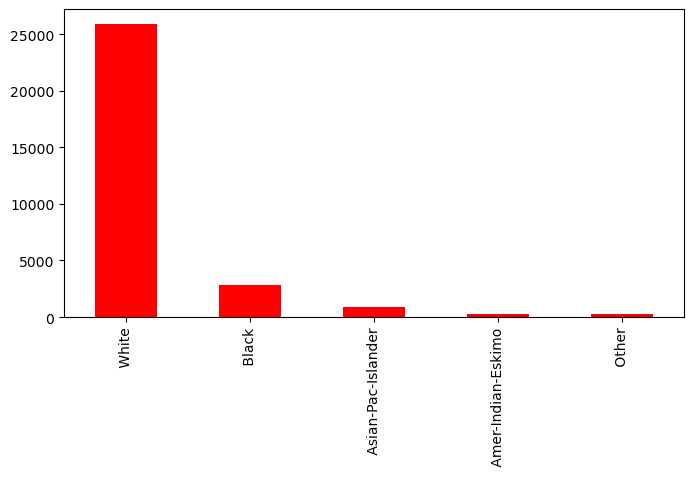

In [10]:
plt.figure(figsize=(8,4))
train_data.race.value_counts().plot.bar(color='red');

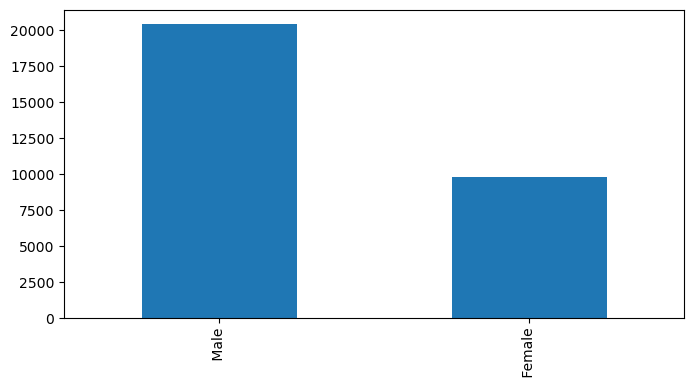

In [11]:
plt.figure(figsize=(8,4))
train_data.sex.value_counts().plot.bar();

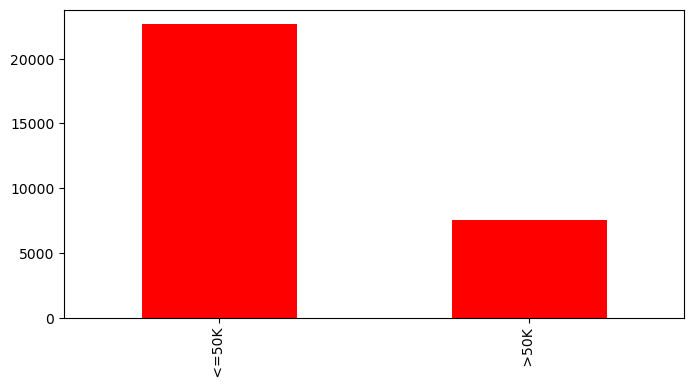

In [12]:
plt.figure(figsize=(8,4))
train_data.Salary.value_counts().plot.bar(color='red');

In [13]:
# Encode categorical features
le = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

for col in categorical_cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [14]:
# Define features and target variable
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [15]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Define the parameter grid
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
}

In [17]:
# Initialize SVM model
svm_model = SVC()

In [18]:
# Perform grid search for each kernel
best_models = {}

for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
    grid_search.fit(X_train_scaled, y_train)
    best_models[kernel] = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.830 total time=  41.5s
[CV 2/5] END .............................C=0.1;, score=0.836 total time=  39.8s
[CV 3/5] END .............................C=0.1;, score=0.841 total time=  39.6s
[CV 4/5] END .............................C=0.1;, score=0.842 total time=  39.3s
[CV 5/5] END .............................C=0.1;, score=0.835 total time=  39.1s
[CV 1/5] END ...............................C=1;, score=0.839 total time=  39.0s
[CV 2/5] END ...............................C=1;, score=0.843 total time=  38.5s
[CV 3/5] END ...............................C=1;, score=0.846 total time=  38.2s
[CV 4/5] END ...............................C=1;, score=0.849 total time=  38.1s
[CV 5/5] END ...............................C=1;, score=0.844 total time=  38.3s
[CV 1/5] END ..............................C=10;, score=0.839 total time=  48.4s
[CV 2/5] END ..............................C=10;,

In [19]:
# Print the best parameters for each kernel
for kernel, model in best_models.items():
    print(f"Best Parameters for {kernel} kernel:", model.get_params())

Best Parameters for linear kernel: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Parameters for rbf kernel: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [20]:
# Perform grid search for each kernel
best_models = {}

for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
    grid_search.fit(X_train_scaled, y_train)
    best_models[kernel] = grid_search.best_estimator_

    # Print the best parameters for each kernel
    print(f"Best Parameters for {kernel} kernel:", grid_search.best_params_)

    # Print additional information (optional)
    print(f"Best Score for {kernel} kernel:", grid_search.best_score_)
    print("Grid Search Results:")
    print(pd.DataFrame(grid_search.cv_results_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.830 total time=  53.1s
[CV 2/5] END .............................C=0.1;, score=0.836 total time=  43.1s
[CV 3/5] END .............................C=0.1;, score=0.841 total time=  41.6s
[CV 4/5] END .............................C=0.1;, score=0.842 total time=  41.3s
[CV 5/5] END .............................C=0.1;, score=0.835 total time=  40.6s
[CV 1/5] END ...............................C=1;, score=0.839 total time=  39.6s
[CV 2/5] END ...............................C=1;, score=0.843 total time=  41.3s
[CV 3/5] END ...............................C=1;, score=0.846 total time=  38.0s
[CV 4/5] END ...............................C=1;, score=0.849 total time=  37.7s
[CV 5/5] END ...............................C=1;, score=0.844 total time=  38.1s
[CV 1/5] END ..............................C=10;, score=0.839 total time=  47.7s
[CV 2/5] END ..............................C=10;,

In [21]:
# Initialize SVM model with the best parameters
final_svm_model = SVC(C=1, gamma=0.1, kernel='linear')

In [22]:
# Fit the final model on the scaled training data
final_svm_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [23]:
# Make predictions on the scaled test data
y_pred = final_svm_model.predict(X_test_scaled)

In [24]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Final Model: {accuracy * 100:.2f}%")

Accuracy of the Final Model: 80.88%


In [25]:
# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     11360
        >50K       0.76      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.64      0.67     15060
weighted avg       0.80      0.81      0.78     15060

